<a href="https://colab.research.google.com/github/josevypz/EDA-Telecom-churn/blob/main/Jose_Vypana_telecom_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.
Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention.

#**Importing Libraries and loading the data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
url='https://drive.google.com/file/d/19FfTrGFiIb-Aw-8gNMiggCwLS_65EtpD/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [ ]:
df.head()             # getting the first five rows

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

There are 19 colums and 3333 rows. The data type for all numeric values are integer or float we don't have to convert string to integer or float.

In [ ]:
df.isna().sum()            # checking for null values

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

There are no null values in any of the column

In [ ]:
df[df.duplicated()]          #checking for duplicates

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn


There are no duplicate values

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


#**Churn**

In [3]:
# Getting the total number of customers who have churned
churning_status = df['Churn'].value_counts()
print(churning_status)

False    2850
True      483
Name: Churn, dtype: int64


Text(0.5, 1.0, 'percentage of total churned and unchurned customers ')

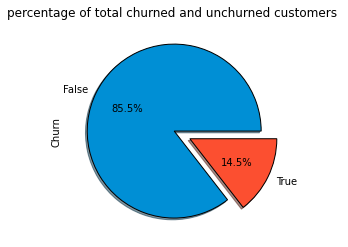

In [4]:
# calculating percentage of total churned and unchured customers
churning_status.plot(kind = 'pie',autopct = '%1.1f%%',wedgeprops = {'edgecolor':'black'},colors = ['#008fd5','#fc4f30'],explode = [0,0.2],shadow = True )
plt.title("percentage of total churned and unchurned customers ")

**14.5% of the total customers have churned**






**International Plan**

In [ ]:
#calculating total number of International customers
international_plan_customers = df['International plan'].value_counts()
print(international_plan_customers)

No     3010
Yes     323
Name: International plan, dtype: int64


Text(0.5, 1.0, 'International Plan')

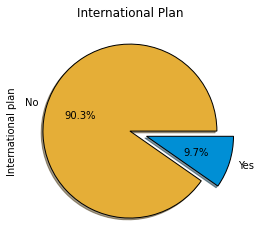

In [ ]:
international_plan_customers.plot(kind = 'pie',autopct = '%1.1f%%',wedgeprops = {'edgecolor':'black'},colors = ['#e5ae37','#008fd5'],explode = [0,0.2],shadow = True)
plt.title("International Plan")

**Only 9.7% of the customers have international plan**

In [ ]:
df_international_plan = df.groupby('International plan')['Churn'].value_counts().unstack()

In [ ]:
df_international_plan['percenatge_churning'] = df_international_plan.apply(lambda x: x[1]*100/(x[1]+x[0]),axis=1)
df_international_plan

Churn,False,True,percenatge_churning
International plan,,,
No,2664,346,11.495017
Yes,186,137,42.414861


Customers who has subscribed to international plan have a churning of 42%. Customers who have no international plan have only 11% churning.






Text(0.5, 1.0, 'churning count of customers with and without international plan')

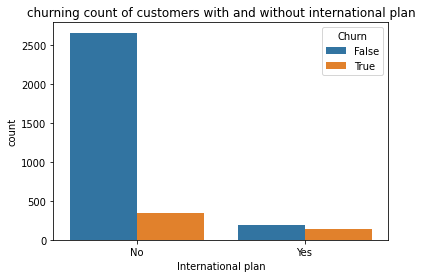

In [ ]:
sns.countplot(x = 'International plan',hue = 'Churn',data = df)
plt.title("churning count of customers with and without international plan")

This indicates that customers having international plan has very high churning percentage when compared with customers having domestic plan

In [ ]:
df[(df['International plan']=='No') & (df['Total intl calls']!=0)].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False


This indicates that people who donot have international plan can also make international calls

**Total intl minutes**

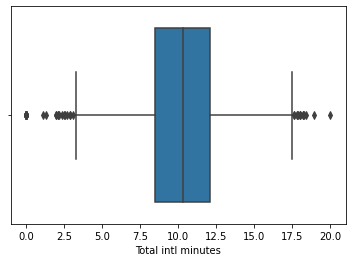

In [ ]:
sns.boxplot(x = 'Total intl minutes',data = df)

In [ ]:
np.percentile(df['Total intl minutes'],75)

12.1

In [ ]:
np.percentile(df['Total intl minutes'],25)

8.5

In [ ]:
mean_Total_intl_minutes = df['Total intl minutes'].mean()
print(mean_Total_intl_minutes)

10.237293729372938


In [ ]:
df6 = df.loc[:,['Total intl minutes','Churn']]

In [ ]:
df6.head()

,Total intl minutes,Churn
0,10.0,False
1,13.7,False
2,12.2,False
3,6.6,False
4,10.1,False


In [ ]:
df6[df6['Total intl minutes']<=0]   # checking for any outlier value and to find people who did not place any international calls

,Total intl minutes,Churn
179,0.0,False
343,0.0,False
488,0.0,False
595,0.0,False
712,0.0,False
878,0.0,False
1028,0.0,False
1080,0.0,False
1400,0.0,False
1564,0.0,False


In [ ]:
df6['Total intl minutes'].max()

20.0

In [ ]:
df6['Total intl minutes category'] = pd.cut(df6['Total intl minutes'],bins = [-1,0,5,10,15,20],labels = ['0','1-5','6-10','11-15','16-20'])

In [ ]:
df6.head()

,Total intl minutes,Churn,Total intl minutes category
0,10.0,False,6-10
1,13.7,False,11-15
2,12.2,False,11-15
3,6.6,False,6-10
4,10.1,False,11-15


In [ ]:
df6_total_intl_minutes = df6.groupby('Total intl minutes category')['Churn'].value_counts().unstack()
df6_total_intl_minutes

Churn,False,True
Total intl minutes category,,
0,18.0,NaN
1-5,81.0,11.0
6-10,1242.0,189.0
11-15,1410.0,259.0
16-20,99.0,24.0


In [ ]:
df6_total_intl_minutes.fillna(0,inplace = True)

In [ ]:
df6_total_intl_minutes

Churn,False,True
Total intl minutes category,,
0,18.0,0.0
1-5,81.0,11.0
6-10,1242.0,189.0
11-15,1410.0,259.0
16-20,99.0,24.0


In [ ]:
df6_total_intl_minutes['Percentage churning'] = df6_total_intl_minutes.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
df6_total_intl_minutes

Churn,False,True,Percentage churning
Total intl minutes category,,,
0,18.0,0.0,0.000000
1-5,81.0,11.0,11.956522
6-10,1242.0,189.0,13.207547
11-15,1410.0,259.0,15.518274
16-20,99.0,24.0,19.512195


Text(0.5, 1.0, 'Percentage churning v/s Total intl minutes category')

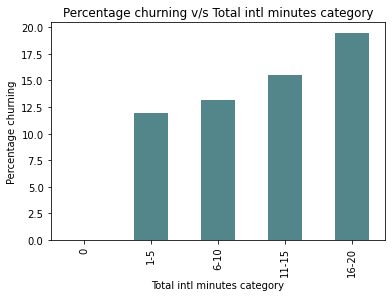

In [ ]:
df6_total_intl_minutes['Percentage churning'].plot(kind = 'bar',color = '#53868B')
plt.ylabel('Percentage churning')
plt.title('Percentage churning v/s Total intl minutes category')

The churning percentage is found to have an increase in trend with increase in total international minutes

**Total intl calls**

In [ ]:
df3 = df.loc[:,['Total intl calls','Churn']]

In [ ]:
df3.head()

,Total intl calls,Churn
0,3,False
1,3,False
2,5,False
3,7,False
4,3,False


In [ ]:
df3['Total intl calls'].value_counts().sort_values()

17      1
19      1
20      1
16      2
18      3
14      6
15      7
13     14
12     15
0      18
11     28
10     50
9     109
8     116
1     160
7     218
6     336
5     472
2     489
4     619
3     668
Name: Total intl calls, dtype: int64

In [ ]:
df3['Total intl calls'].max()

20

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


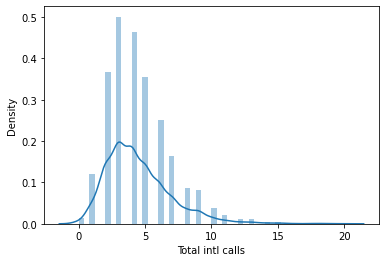

In [ ]:
sns.distplot(df['Total intl calls'])

In [ ]:
df3['intl calls category'] = pd.cut(df3['Total intl calls'],bins = [-1,0,3,6,9,14,20],labels = ['0','1-3','4-6','7-9','10-14','15-20'])

Here Total intl calls is a continious data, so we convert it into categorical data using '**pd.cut**'.
Ex if we put bins = [-1,0,-3] will be (-1,0] and (0,3].
In (-1,0] -1 is excluded and 0 is included (half open or half closed interval). 
 Here bins are divided into unequal width.

In [ ]:
df3.head()

,Total intl calls,Churn,intl calls category
0,3,False,1-3
1,3,False,1-3
2,5,False,4-6
3,7,False,7-9
4,3,False,1-3


In [ ]:
df3_intl_calls = df3.groupby('intl calls category')['Churn'].value_counts().unstack()
df3_intl_calls

Churn,False,True
intl calls category,,
0,18.0,NaN
1-3,1080.0,237.0
4-6,1252.0,175.0
7-9,391.0,52.0
10-14,98.0,15.0
15-20,11.0,4.0


In [ ]:
df3_intl_calls.fillna(0,inplace = True)

In [ ]:
df3_intl_calls

Churn,False,True
intl calls category,,
0,18.0,0.0
1-3,1080.0,237.0
4-6,1252.0,175.0
7-9,391.0,52.0
10-14,98.0,15.0
15-20,11.0,4.0


In [ ]:
df3_intl_calls['Percentage churning'] = df3_intl_calls.apply(lambda x: x[1]*100/(x[0]+x[1]),axis = 1)

In [ ]:
df3_intl_calls

Churn,False,True,Percentage churning
intl calls category,,,
0,18.0,0.0,0.000000
1-3,1080.0,237.0,17.995444
4-6,1252.0,175.0,12.263490
7-9,391.0,52.0,11.738149
10-14,98.0,15.0,13.274336
15-20,11.0,4.0,26.666667


Text(0.5, 1.0, 'intl calls category v/s percentage churning')

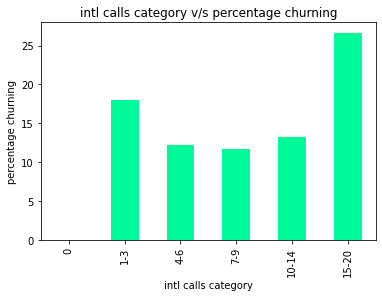

In [ ]:
df3_intl_calls['Percentage churning'].plot(kind = 'bar',color = '#00FA9A')
plt.ylabel('percentage churning')
plt.title('intl calls category v/s percentage churning')

The churning percenatge of customers in 15-20 category is greater than 25%

In [ ]:
df_intl = df[df['Total intl calls']!=0]

In [ ]:
df_intl['Total intl rate'] = df_intl.apply(lambda x: x['Total intl charge']/x['Total intl minutes'],axis=1) 

Total intl rate is the charge of international calls per minutes.
 Ex if a person calls for 10 min and the total charge is 2 rupees then for calling 1 min the charge is 2/10 = 0.2 rupees

In [ ]:
df_intl.groupby('International plan')['Total intl rate'].mean().reset_index()

,International plan,Total intl rate
0,No,0.270059
1,Yes,0.270038


The total intl rate was same irrespective of whether customer has international plan or not


**State**

In [ ]:
df['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [ ]:
df['State'].nunique()

51

**Calculating state wise variation of churn**

In [ ]:
churn_in_state = df.groupby('State')['Churn'].value_counts().unstack()        
churn_in_state

Churn,False,True
State,,
AK,49,3
AL,72,8
AR,44,11
AZ,60,4
CA,25,9
CO,57,9
CT,62,12
DC,49,5
DE,52,9


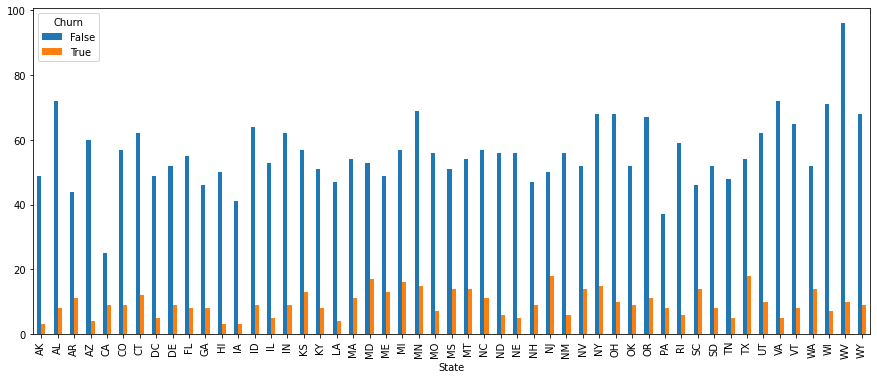

In [ ]:
# Plotting the number of people who churned and did not churn in each state
plt.rcParams['figure.figsize'] = (15,6)
churn_in_state.plot(kind = 'bar')


**Calculating percenatge churn for each state**

In [ ]:
churn_in_state['Percentage_churning_in_state'] = churn_in_state[True]/(churn_in_state[False] + churn_in_state[True]) * 100

In [ ]:
churn_in_state

Churn,False,True,Percentage_churning_in_state
State,,,
AK,49,3,5.769231
AL,72,8,10.000000
AR,44,11,20.000000
AZ,60,4,6.250000
CA,25,9,26.470588
CO,57,9,13.636364
CT,62,12,16.216216
DC,49,5,9.259259
DE,52,9,14.754098


In [ ]:
churn_in_state.sort_values(by = 'Percentage_churning_in_state',ascending = False,inplace=True)

**Finding top three states having bad retention rate of the customers**

In [ ]:
# To find the top three states having highest churning rate
churn_in_state.head(3)


Churn,False,True,Percentage_churning_in_state
State,,,
NJ,50,18,26.470588
CA,25,9,26.470588
TX,54,18,25.000000


The state New Jersey (NJ) and California (CA) are having highest churning rate followed by Texas(TX)

In [ ]:
churn_in_state.tail(3)

Churn,False,True,Percentage_churning_in_state
State,,,
AZ,60,4,6.250000
AK,49,3,5.769231
HI,50,3,5.660377


States Arizona (AZ), Alaska (AK) and Hawaii (HW) are states with good retention rate or lowest churning percenatge

In [ ]:
df_churn_state_percentage = churn_in_state[['Percentage_churning_in_state']]
df_churn_state_percentage

Churn,Percentage_churning_in_state
State,
NJ,26.470588
CA,26.470588
TX,25.000000
MD,24.285714
SC,23.333333
MI,21.917808
MS,21.538462
NV,21.212121
WA,21.212121


Text(0.5, 1.0, 'Percentage churning v/s state')

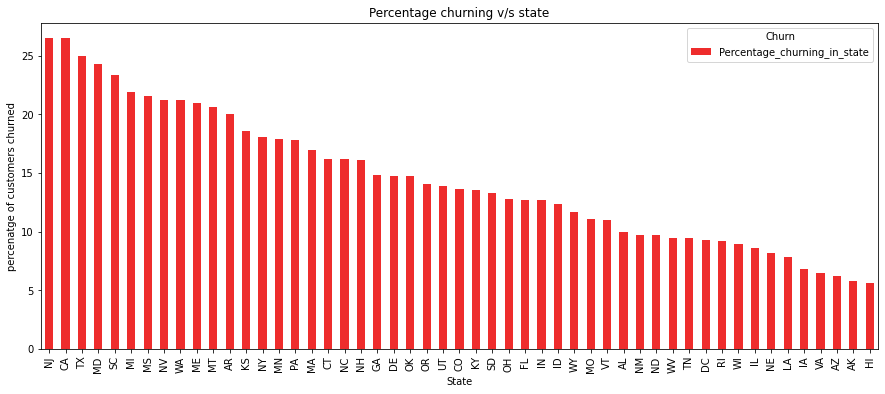

In [ ]:
plt.rcParams['figure.figsize'] = (15,6)
df_churn_state_percentage.plot(kind = 'bar',color = '#EE2C2C')
plt.ylabel("percenatge of customers churned")
plt.title("Percentage churning v/s state")

From the above plot we can identify the states having good and bad customer retention rate

**Area code**


In [ ]:
df['Area code'].unique()

array([415, 408, 510])

In [ ]:
df_areacode = df.groupby('Area code')['Churn'].value_counts().unstack()
df_areacode

Churn,False,True
Area code,,
408,716,122
415,1419,236
510,715,125


Text(0.5, 1.0, 'churn variation with area code')

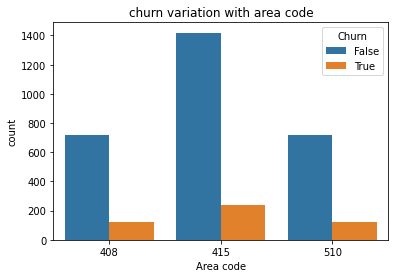

In [ ]:
sns.countplot(x = 'Area code',hue='Churn',data = df)
plt.title('churn variation with area code')

In [ ]:
df_areacode['percentage_churn_areacode'] = df_areacode.apply(lambda x: x[1]/(x[1]+x[0]) * 100,axis=1)

In [ ]:
df_areacode

Churn,False,True,percentage_churn_areacode
Area code,,,
408,716,122,14.558473
415,1419,236,14.259819
510,715,125,14.880952


It is difficult to infer a relationship between percenatge of people churned in differnt area codes as the percentage churning is almost same for the three area codes given

**Customer service calls**

In [ ]:
df['Customer service calls'].unique()

array([1, 0, 2, 3, 4, 5, 7, 9, 6, 8])

In [ ]:
df['Customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density distribution plot of customer service calls')

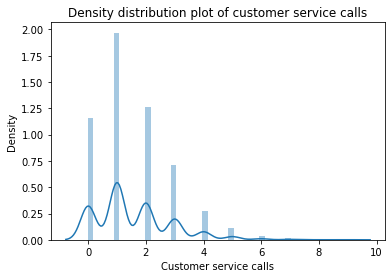

In [ ]:
sns.distplot(df['Customer service calls'],hist=True)
plt.title('Density distribution plot of customer service calls')

In [ ]:
df_customer_service_calls = df.groupby('Customer service calls')['Churn'].value_counts().unstack()
df_customer_service_calls

Churn,False,True
Customer service calls,,
0,605.0,92.0
1,1059.0,122.0
2,672.0,87.0
3,385.0,44.0
4,90.0,76.0
5,26.0,40.0
6,8.0,14.0
7,4.0,5.0
8,1.0,1.0


In [ ]:
df_customer_service_calls.fillna(0,inplace = True)

In [ ]:
df_customer_service_calls

Churn,False,True
Customer service calls,,
0,605.0,92.0
1,1059.0,122.0
2,672.0,87.0
3,385.0,44.0
4,90.0,76.0
5,26.0,40.0
6,8.0,14.0
7,4.0,5.0
8,1.0,1.0


In [ ]:
df_customer_service_calls['percentage_churning_customer_service_calls'] = df_customer_service_calls.apply(lambda x: x[1]*100/(x[1]+x[0]), axis=1)

In [ ]:
df_customer_service_calls

Churn,False,True,percentage_churning_customer_service_calls
Customer service calls,,,
0,605.0,92.0,13.199426
1,1059.0,122.0,10.330229
2,672.0,87.0,11.462451
3,385.0,44.0,10.256410
4,90.0,76.0,45.783133
5,26.0,40.0,60.606061
6,8.0,14.0,63.636364
7,4.0,5.0,55.555556
8,1.0,1.0,50.000000


Text(0, 0.5, 'churning percentage')

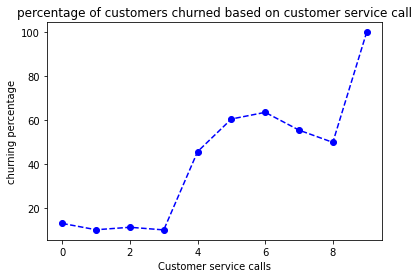

In [ ]:
df_customer_service_calls['percentage_churning_customer_service_calls'].plot(color = 'blue',linestyle = '--',marker = 'o')
plt.title("percentage of customers churned based on customer service call")
plt.ylabel("churning percentage")

Once the customer service calls becames greater than 3, the percentage of churning increases to more than 45%

**Account length**

In [ ]:
df['Account length'].nunique()

212

In [ ]:
df['Account length'].max()

243

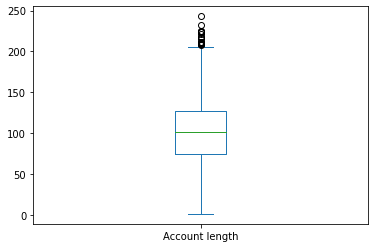

In [ ]:
df['Account length'].plot(kind = 'box')

In [ ]:
upper_quartile_account_length = np.percentile(df['Account length'],75)
lower_quartile_account_length = np.percentile(df['Account length'],25)
median_account_length = np.median(df['Account length'])
IQR_account_length = upper_quartile_account_length - lower_quartile_account_length
print(IQR_account_length)
print(median_account_length)
print(upper_quartile_account_length)
print(lower_quartile_account_length)


53.0
101.0
127.0
74.0


In [ ]:
df1 = df.loc[:,['Account length','Churn']]

In [ ]:
df1.head()

,Account length,Churn
0,128,False
1,107,False
2,137,False
3,84,False
4,75,False


In [ ]:
df1['Account length category'] = pd.cut(df1['Account length'],bins = [0,50,100,150,200,250],labels = ['0-50','50-100','100-150','150-200','200-250'])

In [ ]:
df1.head()

,Account length,Churn,Account length category
0,128,False,100-150
1,107,False,100-150
2,137,False,100-150
3,84,False,50-100
4,75,False,50-100


Text(0.5, 1.0, 'churn variation for different account length categories')

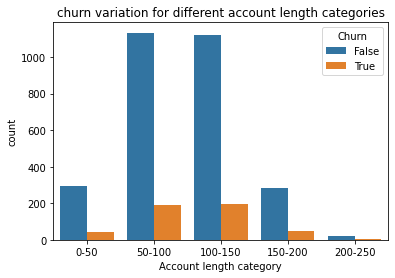

In [ ]:
sns.countplot(x= 'Account length category',hue = 'Churn',data = df1)
plt.title('churn variation for different account length categories')

In [ ]:
df1_account_length = df1.groupby('Account length category')['Churn'].value_counts().unstack()
df1_account_length

Churn,False,True
Account length category,,
0-50,297,44
50-100,1133,190
100-150,1118,195
150-200,282,48
200-250,20,6


The maximum number of people churned is for account length category of 100-150

In [ ]:
df1_account_length['Percenatge churning'] = df1_account_length.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
df1_account_length

Churn,False,True,Percenatge churning
Account length category,,,
0-50,297,44,12.903226
50-100,1133,190,14.361300
100-150,1118,195,14.851485
150-200,282,48,14.545455
200-250,20,6,23.076923


Here, we got the maximum churning percenatge for account length category of 200-250. 

# Voice mail Plan

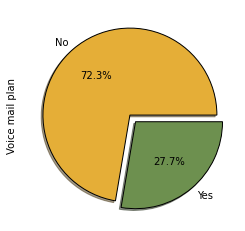

In [5]:
# calculating the total number of users having voice mail plan

df['Voice mail plan'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%',wedgeprops = {'edgecolor':'black'},explode = [0,0.1], colors = ['#e5ae37','#6d904f'],shadow = True)

In [6]:
df_voice_mail_plan = df.groupby('Voice mail plan')['Churn'].value_counts().unstack()
df_voice_mail_plan

Churn,False,True
Voice mail plan,,
No,2008,403
Yes,842,80


In [7]:
df_voice_mail_plan['percenatge_churning_voice_mail_plan'] = df_voice_mail_plan.apply(lambda x: x[1]*100/(x[0]+x[1]),axis = 1)

In [ ]:
df_voice_mail_plan

Churn,False,True,percenatge_churning_voice_mail_plan
Voice mail plan,,,
No,2008,403,16.715056
Yes,842,80,8.676790


Text(0.5, 1.0, 'percentage churning v/s voice mail plan')

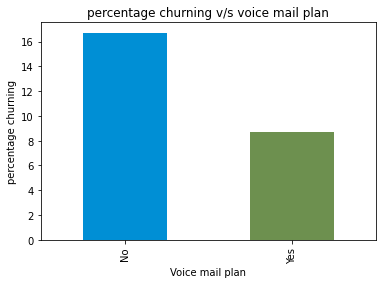

In [21]:
df_voice_mail_plan['percenatge_churning_voice_mail_plan'].plot(kind = 'bar',color = ['#008fd5','#6d904f'])
plt.ylabel("percentage churning")
plt.title('percentage churning v/s voice mail plan')

The churning percenatge is found to be higher for those consumers who donot have voice mail plan

 **Number vmail messages**

In [ ]:
df['Number vmail messages'].unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9])

In [ ]:
df[(df['Voice mail plan'] == 'Yes') & (df['Number vmail messages'] == 0)]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn


There is no one who has voice mail plan but donot send any voice mail messages

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


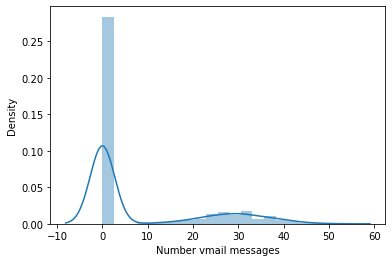

In [ ]:
sns.distplot(df['Number vmail messages'],hist=True)

In [10]:
df2 = df.loc[:,['Number vmail messages','Churn']]
df2.head()

,Number vmail messages,Churn
0,25,False
1,26,False
2,0,False
3,0,False
4,0,False


In [11]:
df2['Number vmail messages'].max()

51

In [12]:
df2['Vmail messages category'] = pd.cut(df2['Number vmail messages'],bins = [-1,0,10,20,30,40,55],labels = ['0','1-10','11-20','21-30','31-40','41-55'])

In [13]:
df2.head()

,Number vmail messages,Churn,Vmail messages category
0,25,False,21-30
1,26,False,21-30
2,0,False,0
3,0,False,0
4,0,False,0


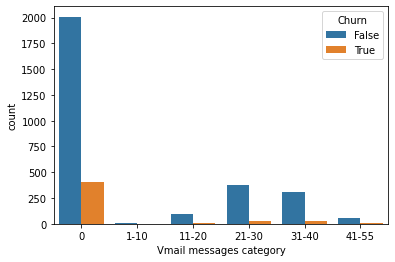

In [14]:
sns.countplot(x = 'Vmail messages category',hue = 'Churn',data = df2)

In [15]:
df2_vmail_messages = df2.groupby('Vmail messages category')['Churn'].value_counts().unstack()
df2_vmail_messages

Churn,False,True
Vmail messages category,,
0,2008.0,403.0
1-10,6.0,NaN
11-20,95.0,8.0
21-30,378.0,30.0
31-40,311.0,31.0
41-55,52.0,11.0


In [16]:
df2_vmail_messages.fillna(0,inplace = True)

In [17]:
df2_vmail_messages

Churn,False,True
Vmail messages category,,
0,2008.0,403.0
1-10,6.0,0.0
11-20,95.0,8.0
21-30,378.0,30.0
31-40,311.0,31.0
41-55,52.0,11.0


In [18]:
df2_vmail_messages['Percenatage churning'] = df2_vmail_messages.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)

In [19]:
df2_vmail_messages

Churn,False,True,Percenatage churning
Vmail messages category,,,
0,2008.0,403.0,16.715056
1-10,6.0,0.0,0.000000
11-20,95.0,8.0,7.766990
21-30,378.0,30.0,7.352941
31-40,311.0,31.0,9.064327
41-55,52.0,11.0,17.460317


**Plotting percenatge churning v/s vmail messages category**

Text(0.5, 1.0, 'percentage churning v/s vmail messages category')

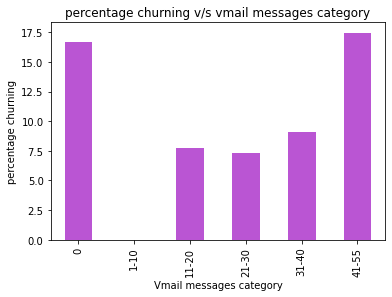

In [20]:
df2_vmail_messages['Percenatage churning'].plot(kind = 'bar',color = '#BA55D3')
plt.ylabel('percentage churning')
plt.title('percentage churning v/s vmail messages category')

**Total day,eve and night minutes**

Text(0.5, 1.0, 'Total day minutes v/s churn')

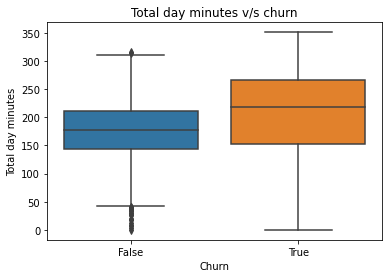

In [ ]:
sns.boxplot(x = 'Churn',y = 'Total day minutes',data=df)
plt.title('Total day minutes v/s churn')

Text(0.5, 1.0, 'Total eve minutes v/s churn')

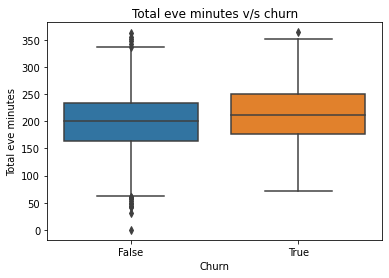

In [ ]:
sns.boxplot(x = 'Churn',y = 'Total eve minutes',data=df)
plt.title('Total eve minutes v/s churn')

Text(0.5, 1.0, 'Total night minutes v/s churn')

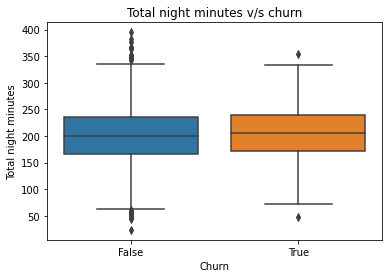

In [ ]:
sns.boxplot(x = 'Churn',y = 'Total night minutes',data=df)
plt.title('Total night minutes v/s churn')

*Analyzing total day minutes*

In [ ]:
df4 = df.loc[:,['Total day minutes','Churn']]

In [ ]:
df4.head()

,Total day minutes,Churn
0,265.1,False
1,161.6,False
2,243.4,False
3,299.4,False
4,166.7,False


In [ ]:
df4['Total day minutes'].max()

350.8

In [ ]:
df4[df4['Total day minutes']<=0]

,Total day minutes,Churn
1345,0.0,True
1397,0.0,False


In [ ]:
df4['Total day minutes category'] = pd.cut(df4['Total day minutes'],bins = [-1,50,100,150,200,250,300,351],labels = ['0-50','51-100','101-150','151-200','201-250','251-300','301-351'])

In [ ]:
df4.head()

,Total day minutes,Churn,Total day minutes category
0,265.1,False,251-300
1,161.6,False,151-200
2,243.4,False,201-250
3,299.4,False,251-300
4,166.7,False,151-200


In [ ]:
df4_total_day_mins = df4.groupby('Total day minutes category')['Churn'].value_counts().unstack()
df4_total_day_mins

Churn,False,True
Total day minutes category,,
0-50,26,4
51-100,185,24
101-150,652,88
151-200,1063,105
201-250,750,108
251-300,163,122
301-351,11,32


In [ ]:
df4_total_day_mins['Percenatge churning'] = df4_total_day_mins.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
df4_total_day_mins

Churn,False,True,Percenatge churning
Total day minutes category,,,
0-50,26,4,13.333333
51-100,185,24,11.483254
101-150,652,88,11.891892
151-200,1063,105,8.989726
201-250,750,108,12.587413
251-300,163,122,42.807018
301-351,11,32,74.418605


Text(0.5, 1.0, 'percentage churning v/s total day minutes category')

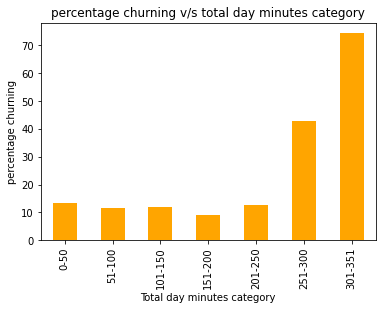

In [ ]:
df4_total_day_mins['Percenatge churning'].plot(kind = 'bar',color = '#FFA500')
plt.ylabel('percentage churning')
plt.title('percentage churning v/s total day minutes category')

The percentage churning rises to more than 40% for Total day minutes category of 251-300 and 300-350

 **Total day,evening and night calls**

Text(0.5, 1.0, 'Total day calls v/s churn')

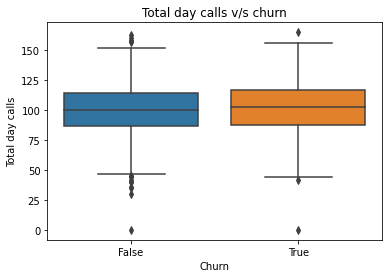

In [ ]:
sns.boxplot(x = 'Churn',y = 'Total day calls',data=df)
plt.title('Total day calls v/s churn')

Text(0.5, 1.0, 'Total eve calls v/s churn')

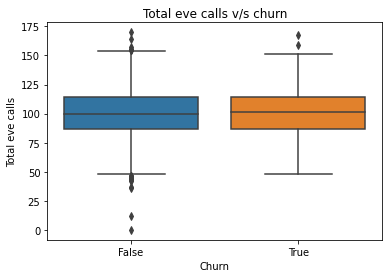

In [ ]:
sns.boxplot(x = 'Churn',y = 'Total eve calls',data=df)
plt.title('Total eve calls v/s churn')

Text(0.5, 1.0, 'Total night calls v/s churn')

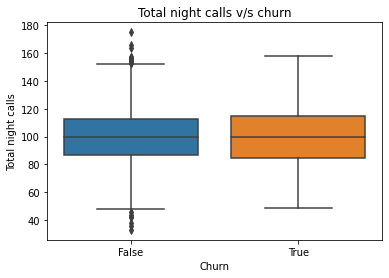

In [ ]:
sns.boxplot(x = 'Churn',y = 'Total night calls',data=df)
plt.title('Total night calls v/s churn')

 **Total day,eve and night charges**

Text(0.5, 1.0, 'Distribution of Total day charge')

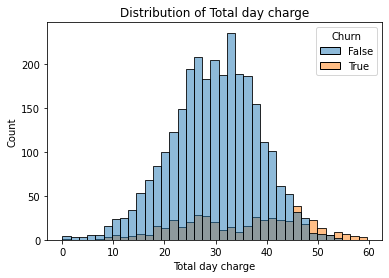

In [ ]:
sns.histplot(x = 'Total day charge',hue = 'Churn',data = df)
plt.title('Distribution of Total day charge')

Text(0.5, 1.0, 'Distribution of Total eve charge')

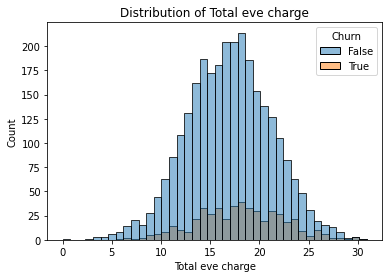

In [ ]:
sns.histplot(x = 'Total eve charge',hue = 'Churn',data = df)
plt.title('Distribution of Total eve charge')

Text(0.5, 1.0, 'Distribution of Total night charge')

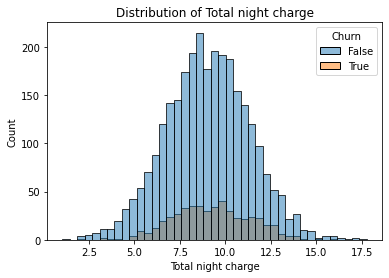

In [ ]:
sns.histplot(x = 'Total night charge',hue = 'Churn',data = df)
plt.title('Distribution of Total night charge')

*Analyzing Total day charges*

In [ ]:
df5 = df.loc[:,['Total day charge','Churn']]

In [ ]:
df5.head()

,Total day charge,Churn
0,45.07,False
1,27.47,False
2,41.38,False
3,50.90,False
4,28.34,False


In [ ]:
df5['Total day charge'].max()

59.64

In [ ]:
df[df['Total day charge']<=0]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1345,SD,98,415,No,No,0,0.0,0,0.0,159.6,130,13.57,167.1,88,7.52,6.8,1,1.84,4,True
1397,VT,101,510,No,No,0,0.0,0,0.0,192.1,119,16.33,168.8,95,7.60,7.2,4,1.94,1,False


There are no outlier values. The Total day charges can be 0 if no calls were made

In [ ]:
df5['Total day charge category'] = pd.cut(df5['Total day charge'],bins = [-1,10,20,30,40,50,60],labels = ['0-10','11-20','21-30','31-40','41-50','51-60'])

In [ ]:
df5.head()

,Total day charge,Churn,Total day charge category
0,45.07,False,41-50
1,27.47,False,21-30
2,41.38,False,41-50
3,50.90,False,51-60
4,28.34,False,21-30


In [ ]:
df5_total_day_charge = df5.groupby('Total day charge category')['Churn'].value_counts().unstack()
df5_total_day_charge

Churn,False,True
Total day charge category,,
0-10,44,6
11-20,329,43
21-30,1039,137
31-40,1120,99
41-50,303,155
51-60,15,43


In [ ]:
df5_total_day_charge['Percenatge churning'] = df5_total_day_charge.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
df5_total_day_charge

Churn,False,True,Percenatge churning
Total day charge category,,,
0-10,44,6,12.000000
11-20,329,43,11.559140
21-30,1039,137,11.649660
31-40,1120,99,8.121411
41-50,303,155,33.842795
51-60,15,43,74.137931


Text(0, 0.5, 'Percentage churning')

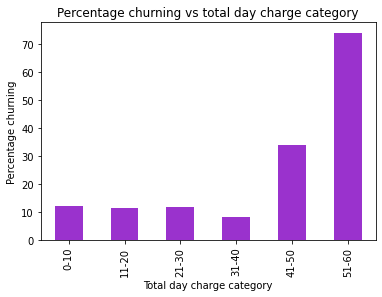

In [ ]:
df5_total_day_charge['Percenatge churning'].plot(kind = 'bar',color = '#9A32CD')
plt.title('Percentage churning vs total day charge category')
plt.ylabel('Percentage churning')

Churning percentage was found to be very high for Total day charge categories off 41-50 and 51-60 

**Other inferences**: finding mean call duration of each state

In [ ]:
df_state_call_minutes = df.groupby('State').agg({'Total day minutes':'mean','Total eve minutes':'mean','Total night minutes':'mean'}).rename(columns = {'Total day minutes':'Mean Total day minutes','Total eve minutes':'Mean Total eve minutes','Total night minutes':'Mean Total night minutes'}).reset_index()

In [ ]:
df_state_call_minutes

,State,Mean Total day minutes,Mean Total eve minutes,Mean Total night minutes
0,AK,178.384615,184.282692,192.326923
1,AL,186.010000,195.462500,187.285000
2,AR,176.116364,201.047273,205.454545
3,AZ,171.604688,187.748437,194.004687
4,CA,183.564706,198.970588,198.508824
5,CO,178.712121,206.884848,189.898485
6,CT,175.140541,203.828378,205.997297
7,DC,171.379630,196.272222,206.348148
8,DE,174.583607,208.247541,203.900000
9,FL,179.533333,210.276190,196.147619


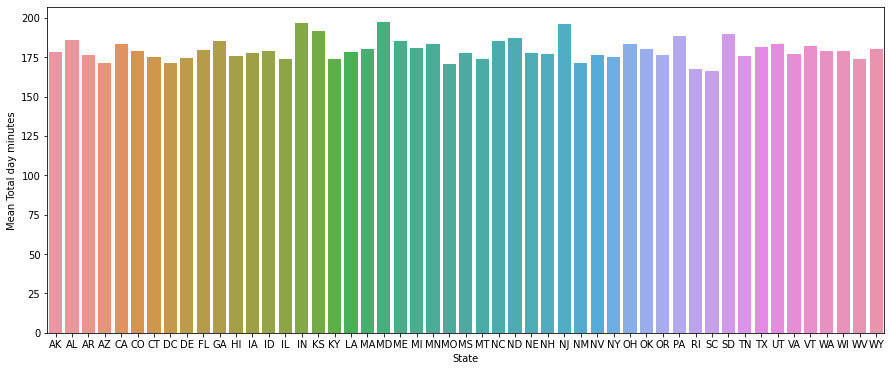

In [ ]:
sns.barplot(x = 'State',y = 'Mean Total day minutes',data = df_state_call_minutes)

States having the highest and lowest day minutes can be found from the above graph. Simliar plots can be drawn for evening and night minutes

**Analyzing the call rates**

In [ ]:
Total_day_Call_rate = df['Total day charge'].mean()/df['Total day minutes'].mean()
Total_eve_Call_rate = df['Total eve charge'].mean()/df['Total eve minutes'].mean()
Total_night_Call_rate = df['Total night charge'].mean()/df['Total night minutes'].mean()
Total_intl_call_rate = df['Total intl charge'].mean()/df['Total intl minutes'].mean()

Text(0.5, 1.0, 'Call rate of day,evening,night and international')

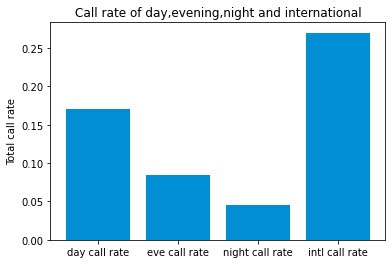

In [ ]:
plt.bar(x = ['day call rate','eve call rate','night call rate','intl call rate'],height = [Total_day_Call_rate,Total_eve_Call_rate,Total_night_Call_rate,Total_intl_call_rate],color = '#008fd5')
plt.ylabel('Total call rate')
plt.title('Call rate of day,evening,night and international')

The call rate during day,evening and night and also call rate for international plots can be seen in this graph

**Correlation**:
International plan and voice mail plan are having object datatype (Yes/No). We replace Yes with 1 and No with 0 for finding correlation 

In [ ]:
df_new_1 = df.replace(r'Yes',1)       # Replacement is done on new dataframe


In [ ]:
df_new_2 = df_new_1.replace(r'No',0)

In [ ]:
df_new_2.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df_new_2.corr()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
International plan,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
Voice mail plan,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
Number vmail messages,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233


**Correlation Heatmap**

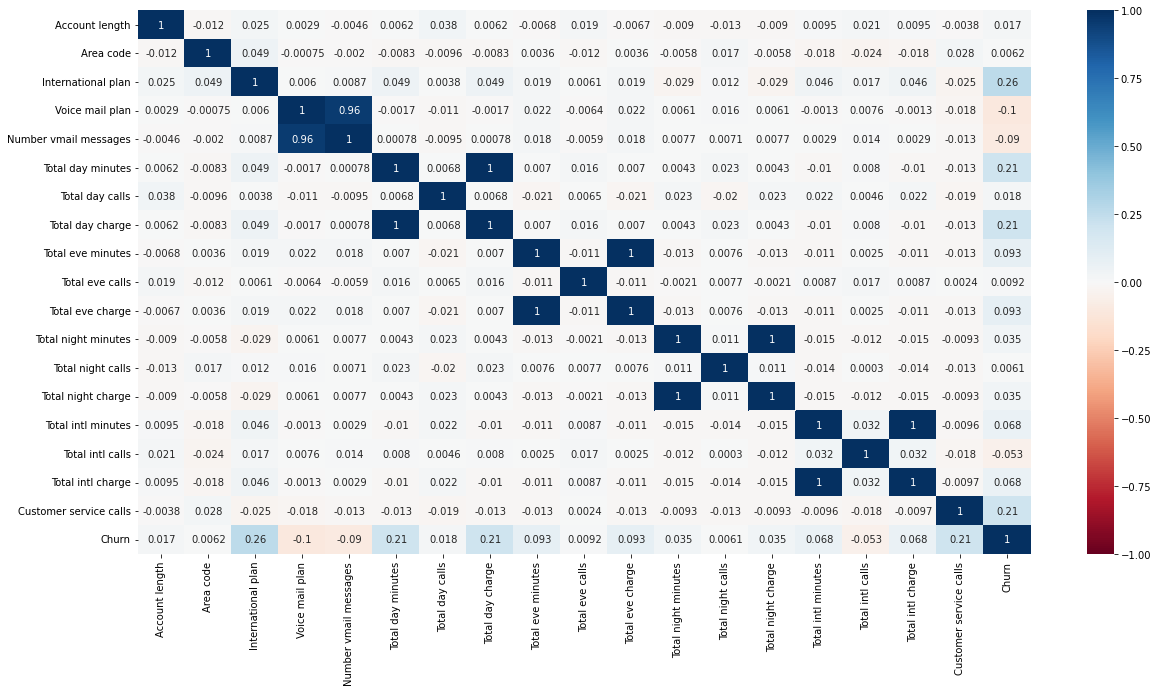

In [ ]:
plt.rcParams['figure.figsize'] = (20,10)
sns.heatmap(df_new_2.corr(),annot = True,cmap = 'RdBu',vmin = -1, vmax =1)


Columns having negative and postive correlation with churn can be identified from the above correlation heatmap

**Correlation Heatmap for selected columns**

In [ ]:
df_new_2_selected = df_new_2[['International plan','Voice mail plan','Number vmail messages','Total day minutes','Customer service calls','Churn']]


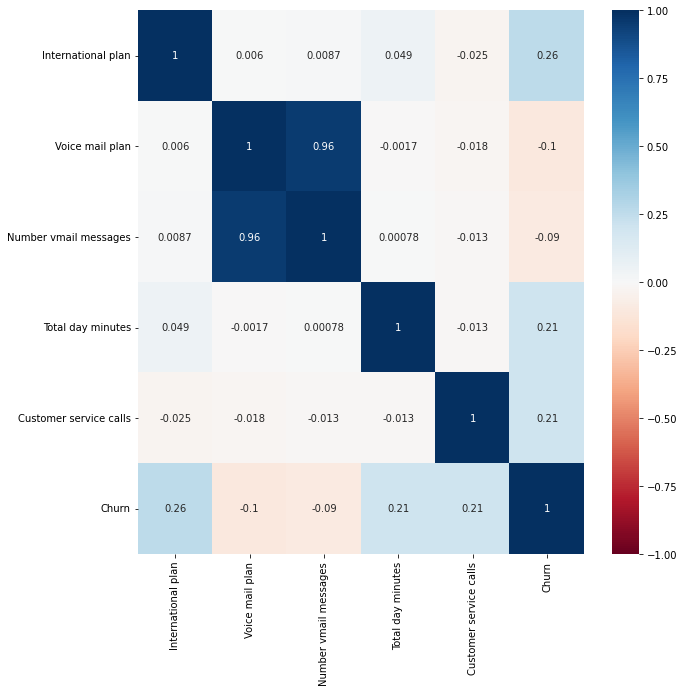

In [ ]:
plt.rcParams['figure.figsize'] = (10,10)
sns.heatmap(df_new_2_selected.corr(),annot = True,cmap = 'RdBu',vmin = -1,vmax = 1)